<a href="https://colab.research.google.com/github/nidjosep/student-feedback-analysis/blob/master/Project_module_emotion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import ssl
import seaborn as sns
from google.colab import drive
from keras.layers import Bidirectional, GlobalMaxPool1D


In [5]:
drive.mount('/content/drive', force_remount=True)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Teaching/TME_6015/Project/data.csv')

Mounted at /content/drive


In [17]:


try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download NLTK stopwords
# nltk.download()
# nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# df = df.head(4000)

df = df[df['Message'].astype(str).str.strip() != '']
df['Message'] = df['Message'].astype(str)

df['Message'] = df['Message'].apply(remove_stop_words)

# Split the data into training and testing sets
train_reviews, test_reviews, train_labels, test_labels = train_test_split(
    df['Message'], df['Feeling'] , test_size=0.2, random_state=42)

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder to your labels and transform them to integers
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(train_reviews)
X_train_seq = tokenizer.texts_to_sequences(train_reviews)
X_test_seq = tokenizer.texts_to_sequences(test_reviews)
X_train_pad = pad_sequences(X_train_seq, maxlen=150)  # Adjust maxlen as needed
X_test_pad = pad_sequences(X_test_seq, maxlen=150)

# tf.keras.layers.Bidirectional(
#     layer, merge_mode="concat", weights=None, backward_layer=None, **kwargs
# )
# Building the LSTM model with cuDNN optimization
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=150))
# model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100)))
# model.add(Dropout(0.2))
model.add(Dense(128, activation='elu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(6, activation='sigmoid', dtype='float32'))  # Ensure output layer uses float32


# Compile the model with adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, train_labels,batch_size=64, epochs=3,
                    validation_data=(X_test_pad, test_labels))



print(history.history['accuracy'])
print(history.history['loss'])


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/11
126/126 [==============================] - 94s 702ms/step - loss: 1.2256 - accuracy: 0.5278 - val_loss: 0.7612 - val_accuracy: 0.7455
Epoch 2/11
126/126 [==============================] - 86s 681ms/step - loss: 0.4787 - accuracy: 0.8325 - val_loss: 0.5252 - val_accuracy: 0.8328
Epoch 3/11
126/126 [==============================] - 87s 693ms/step - loss: 0.2378 - accuracy: 0.9274 - val_loss: 0.5050 - val_accuracy: 0.8493
Epoch 4/11
126/126 [==============================] - 81s 644ms/step - loss: 0.1510 - accuracy: 0.9543 - val_loss: 0.5414 - val_accuracy: 0.8453
Epoch 5/11
126/126 [==============================] - 86s 685ms/step - loss: 0.1134 - accuracy: 0.9648 - val_loss: 0.5562 - val_accuracy: 0.8703
Epoch 6/11
126/126 [==============================] - 86s 681ms/step - loss: 0.0918 - accuracy: 0.9719 - val_loss: 0.6476 - val_accuracy: 0.8543
Epoch 7/11
126/126 [==============================] - 85s 676ms/step - loss: 0.0748 - accuracy: 0.9769 - val_loss: 0.5992 - val_ac

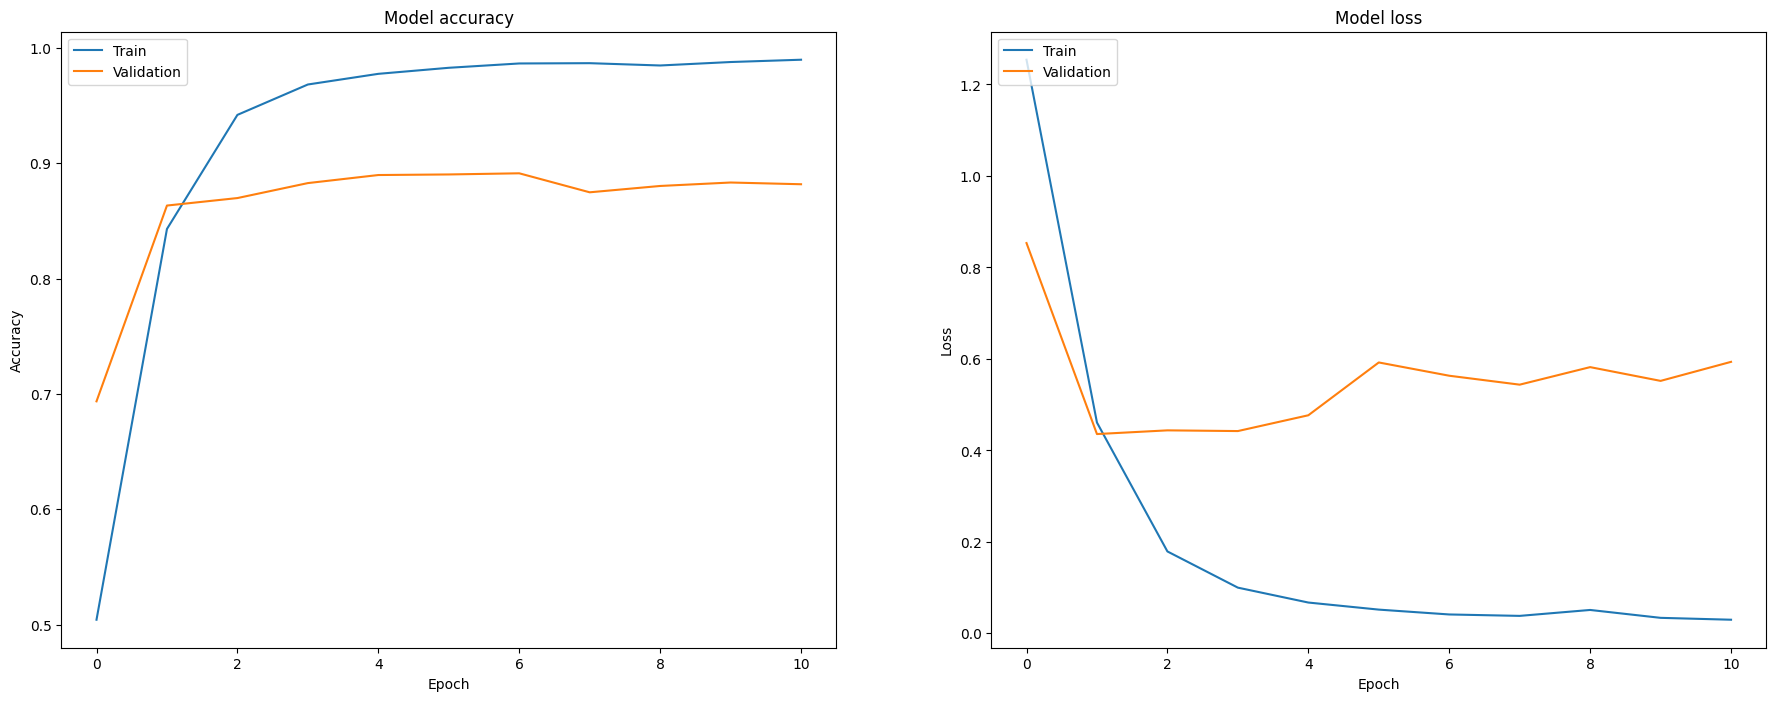

In [8]:

# Plot training & validation accuracy values
plt.figure(figsize=(22, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


63/63 [==============================] - 5s 74ms/step


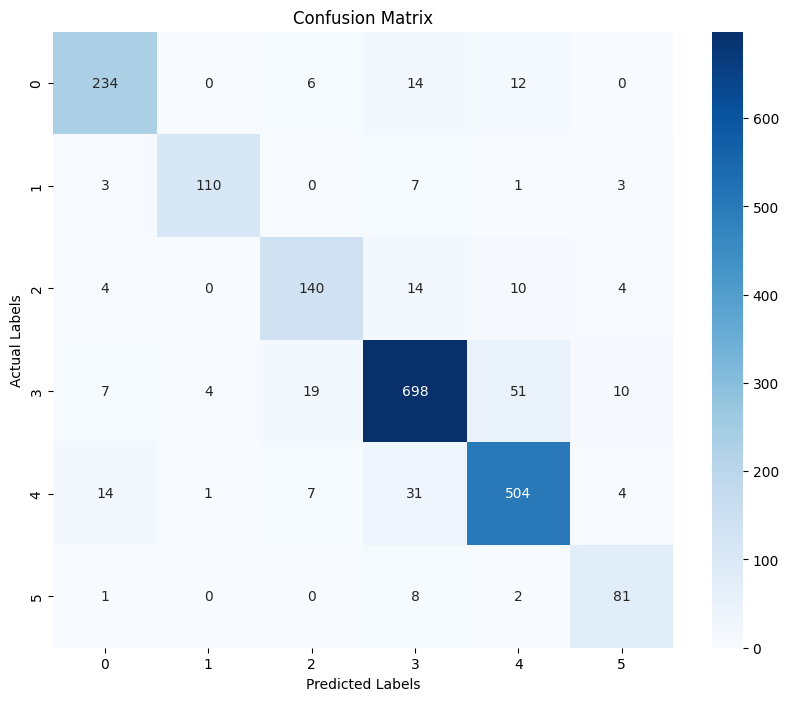

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       266
           1       0.96      0.89      0.92       124
           2       0.81      0.81      0.81       172
           3       0.90      0.88      0.89       789
           4       0.87      0.90      0.88       561
           5       0.79      0.88      0.84        92

    accuracy                           0.88      2004
   macro avg       0.87      0.87      0.87      2004
weighted avg       0.88      0.88      0.88      2004

Accuracy: 0.8817365269461078


In [9]:
# Evaluate the model
model.evaluate(X_test_pad, test_labels)

# Predict classes
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

 # Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Print the classification report
print(classification_report(test_labels, y_pred_classes))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, y_pred_classes)
print(f"Accuracy: {accuracy}")


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have the tokenizer used during training
# tokenizer = ... (Load or create the tokenizer used during training)

# Custom text input
custom_text = "I sometimes feel lost during lab sessions. More structured guidance would be appreciated."

# Tokenize the text
sequences = tokenizer.texts_to_sequences([custom_text])

# Pad the sequence (use the same max_length as used during training)
max_length = 100  # This should be the same as what you used in training
padded_sequence = pad_sequences(sequences, maxlen=max_length)


# Predict
prediction = model.predict(padded_sequence)

# Process the prediction (depends on your model output)
# For example, if it's a classification model:
predicted_class = np.argmax(prediction, axis=1)

# If you have label encoding, you can convert it back to a label
predicted_label = label_encoder.inverse_transform(predicted_class)
print(predicted_label)


1/1 [==============================] - 0s 148ms/step
['sad']
